
# Feature Screening

In [1]:
# NOTE: Installed dgufs directly in dir by traversing file tree.

# Experimental setup:
# * Check paper
# * Do grid search (10 configs) on 100 bootstrap samples each (write in thesis 1000 
#  experiments in total, experiments motivated by Vallieres (who did 100 bootstrap samples)).
# * Inspect votes per feature. Select features with the most votes in each round. 
#   Reason if selecting features on sound logic.

# Assess feature stability:
# * https://academic.oup.com/gigascience/article/7/4/giy032/4958979
# * https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
# * http://jmlr.org/papers/volume18/16-079/16-079.pdf


"""
To assess the stability of feature selection methods, we used a stability measure proposed 
by Yu et al.32 under the hard data perturbation settings33. We quantified the stability of 
a method as the similarity between the results obtained by the same feature selection method, 
when applied on the two non-overlapping partitions (of size N/2) of the training cohort (Lung1). 
To compute similarity between the two resultant feature sets, a weighted complete bipartite graph 
was constructed, where the two node sets corresponded to the two sets of selected features. The 
edge weights were assigned as the absolute Spearman correlation coefficient between the features 
at the nodes. We then applied the Hungarian algorithm34 to identify the maximum weighted matching 
between the two node sets, and then similarity (stability) was quantified as the final matching cost. 
For each feature selection method, we computed the stability 100 times using a bootstrap approach and 
reported the median±std values in the results.

Parmar (2015)

"""

import numpy as np
import pandas as pd

from dgufs.dgufs import DGUFS

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import normalized_mutual_info_score

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Objective: remove redundant and correlated features.

In [2]:
data_sq = pd.read_csv('./../../../data_source/to_analysis/sqroot_concat.csv', index_col=0)
data_log = pd.read_csv('./../../../data_source/to_analysis/gauss05_concat.csv', index_col=0)
data_sq.shape, data_log.shape

((198, 607), (198, 610))

In [21]:
X = pd.concat((data_sq, data_log), axis=1)
X.shape

(198, 1217)

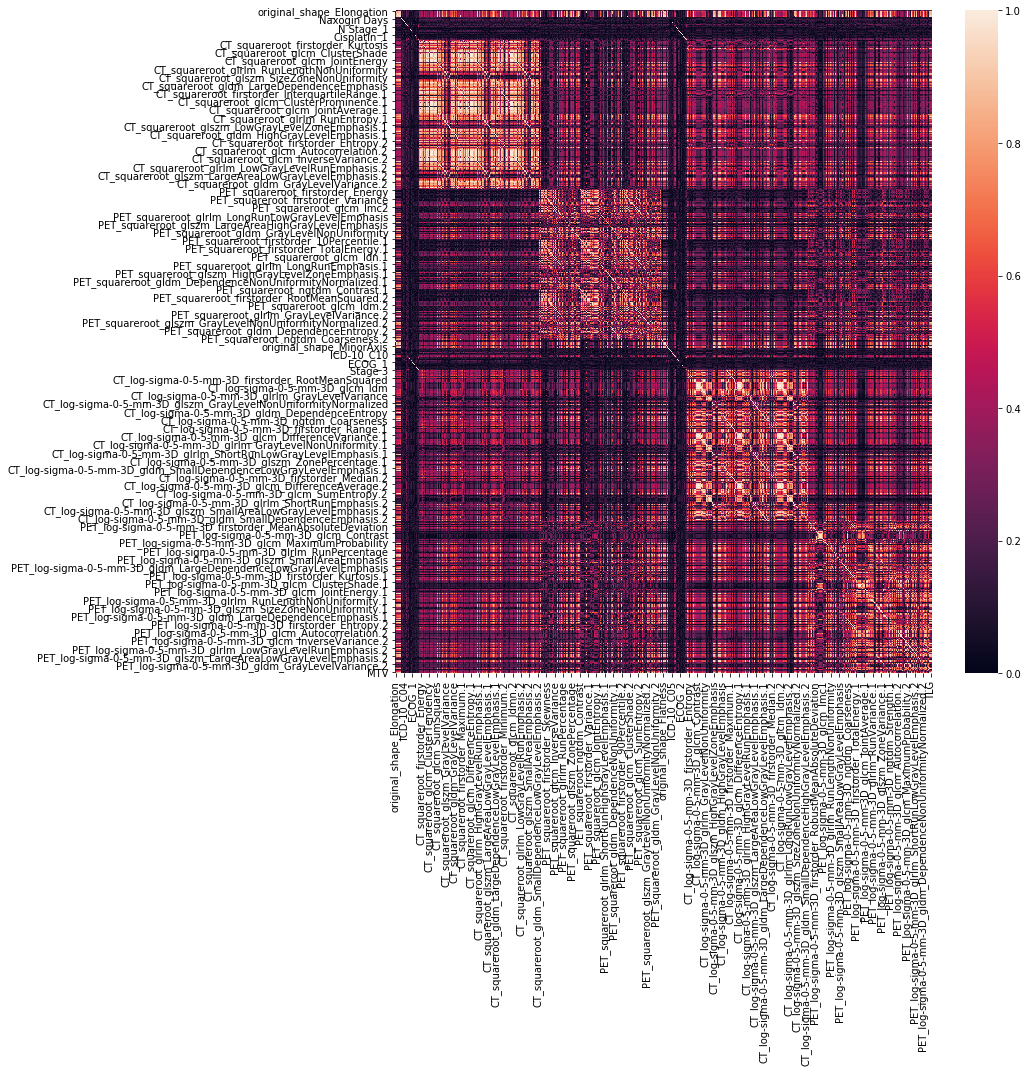

In [19]:
plt.figure(figsize=(15, 15))
#plt.axis('off')
sns.heatmap(
    X.corr(method='spearman').abs()
)
plt.tight_layout()

(0.0, 100.0, 198.0, 0.0)

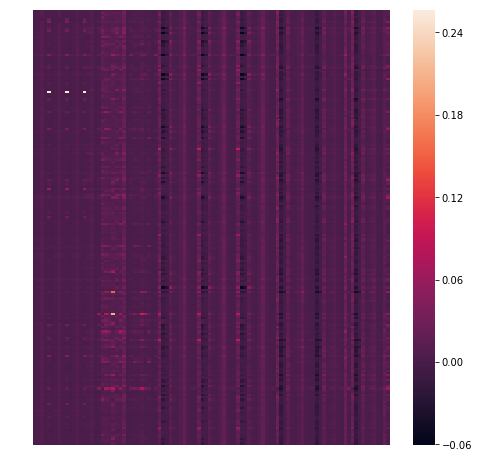

In [38]:
rater = DGUFS(num_clusters=2, num_features=100)
rater.fit(X.values)

plt.figure(figsize=(8, 8))
sns.heatmap(X.values[:, rater.support])
plt.axis('off')